In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.stats.diagnostic import het_arch
from arch import arch_model

from scipy.stats import jarque_bera, kurtosis

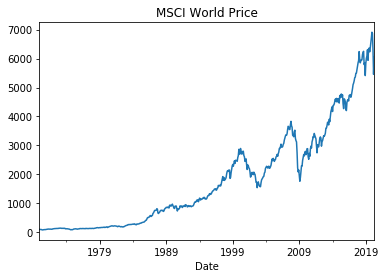

In [36]:
#Import Data
equities_MSCI = pd.read_csv('Equities_MSCI_Monthly_USD.csv', index_col = 0)
equities_MSCI.index = pd.to_datetime(equities_MSCI.index, format = '%d/%m/%Y')
equities_MSCI_returns = np.log(1 + equities_MSCI.pct_change()[1:])
#Price
equities_MSCI['MSCI World'].plot()
plt.title('MSCI World Price')
plt.show()

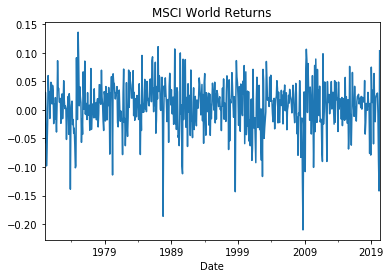

In [35]:
#Log Returns
equities_MSCI_returns['MSCI World'].plot()
plt.title('MSCI World Returns')
plt.show()

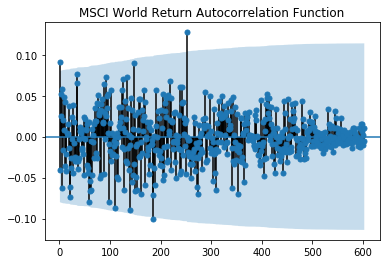

In [37]:
#Autocorrelation Plot
variable = equities_MSCI_returns['MSCI World']
acfplot = plot_acf(variable[pd.Series.first_valid_index(variable):], alpha = .05, zero = False)
plt.title('MSCI World Return Autocorrelation Function')
plt.show()

In [5]:
#Augmented Dickey-Fuller Test
X = equities_MSCI_returns['MSCI World']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Observations Used %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if (result[1]<0.05):
    print("Reject null at 5% level? YES")
else:
    print("Reject null at 5% level? NO")

ADF Statistic: -22.298841
p-value: 0.000000
Lags Used: 0.000000
Observations Used 603.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Reject null at 5% level? YES


In [6]:
#Fit ARMA(1,1) Model
Y = equities_MSCI_returns['MSCI World']
model = ARIMA(Y, order=(1,0,1)) #AR(1), I(0), MA(1)
model_fit = model.fit(disp=False,method='mle')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             MSCI World   No. Observations:                  604
Model:                     ARMA(1, 1)   Log Likelihood                1049.550
Method:                           mle   S.D. of innovations              0.043
Date:                Mon, 01 Jun 2020   AIC                          -2091.101
Time:                        17:50:27   BIC                          -2073.486
Sample:                    01-30-1970   HQIC                         -2084.246
                         - 04-30-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0068      0.002      3.689      0.000       0.003       0.010
ar.L1.MSCI World    -0.5957      0.150     -3.968      0.000      -0.890      -0.301
ma.L1.MSCI World     0.6996 

C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)
C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [59]:
#Model Comparison
ARMA_01 = ARIMA(Y, order=(0,0,1)).fit(disp=False,method='mle')
ARMA_10 = ARIMA(Y, order=(1,0,0)).fit(disp=False,method='mle')
ARMA_11 = ARIMA(Y, order=(1,0,1)).fit(disp=False,method='mle')
#ARMA_12 = ARIMA(Y, order=(1,0,2)).fit(disp=False,method='mle')
ARMA_21 = ARIMA(Y, order=(2,0,1)).fit(disp=False,method='mle')
ARMA_22 = ARIMA(Y, order=(2,0,2)).fit(disp=False,method='mle')

model_comparison = pd.DataFrame(columns = ['Model', 'AIC', 'BIC', 'HQC', 'Residuals'])
model_comparison = model_comparison.append({'Model': 'ARMA(0,1)', 'AIC': ARMA_01.aic, 'BIC': ARMA_01.bic, 'HQC': ARMA_01.hqic}, ignore_index = True)
model_comparison = model_comparison.append({'Model': 'ARMA(1,0)', 'AIC': ARMA_10.aic, 'BIC': ARMA_10.bic, 'HQC': ARMA_10.hqic}, ignore_index = True)
model_comparison = model_comparison.append({'Model': 'ARMA(1,1)', 'AIC': ARMA_11.aic, 'BIC': ARMA_11.bic, 'HQC': ARMA_11.hqic}, ignore_index = True)
#model_comparison = model_comparison.append({'Model': 'ARMA(1,2)', 'AIC': ARMA_12.aic, 'BIC': ARMA_12.bic, 'HQC': ARMA_12.hqic}, ignore_index = True)
model_comparison = model_comparison.append({'Model': 'ARMA(2,1)', 'AIC': ARMA_21.aic, 'BIC': ARMA_21.bic, 'HQC': ARMA_21.hqic}, ignore_index = True)
model_comparison = model_comparison.append({'Model': 'ARMA(2,2)', 'AIC': ARMA_22.aic, 'BIC': ARMA_22.bic, 'HQC': ARMA_22.hqic}, ignore_index = True)
model_comparison

C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)
C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)
C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)
C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)
C:\Users\maxru\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  % freq, ValueWarning)


,Model,AIC,BIC,HQC,Residuals
0,"ARMA(0,1)",-2089.042820,-2075.832097,-2083.901682,NaN
1,"ARMA(1,0)",-2088.438298,-2075.227576,-2083.297160,NaN
2,"ARMA(1,1)",-2091.100642,-2073.486346,-2084.245792,NaN
3,"ARMA(2,1)",-2089.100833,-2067.082962,-2080.532270,NaN
4,"ARMA(2,2)",-2087.546241,-2061.124796,-2077.263966,NaN


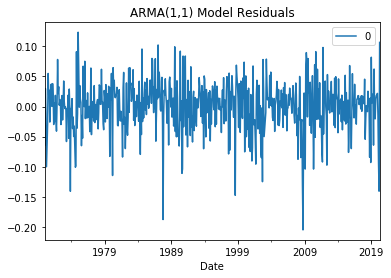

In [39]:
#Residual Errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA(1,1) Model Residuals')
plt.show()

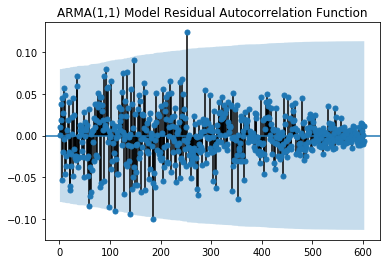

In [40]:
#Check residuals are not serially correlated
acfplot = plot_acf(residuals, alpha = .05, zero = False)
plt.title('ARMA(1,1) Model Residual Autocorrelation Function')
plt.show()

In [61]:
#GARCH - errors z_t*sigma_t
garch_model = arch_model(residuals, 
                         mean='AR', 
                         vol='GARCH', 
                         p=1, q=1, 
                         dist = 'normal')

garch_model_fit = garch_model.fit()
print(garch_model_fit.summary())
#alpha[1] = lagged squared mean model residual
#beta[1] = lagged variance

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1069.9255117293233
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1070.1603484411917
Iteration:      3,   Func. Count:     26,   Neg. LLF: -1070.4274930369247
Iteration:      4,   Func. Count:     37,   Neg. LLF: -1070.4293810945983
Iteration:      5,   Func. Count:     47,   Neg. LLF: -1070.4892698467702
Iteration:      6,   Func. Count:     55,   Neg. LLF: -1070.4979157442253
Iteration:      7,   Func. Count:     64,   Neg. LLF: -1070.4980849875767
Iteration:      8,   Func. Count:     71,   Neg. LLF: -1070.5031797490117
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1070.503180275339
            Iterations: 9
            Function evaluations: 73
            Gradient evaluations: 8
                           AR - GARCH Model Results                           
Dep. Variable:                      0   R-squared:                      -0.001
Mean Model:                        AR   A

C:\Users\maxru\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001812. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [65]:
vol_model_comparison = pd.DataFrame(columns = ['Model', 'AIC', 'BIC', 'LL', 'MSE', 'QLIKE'])

AR_GARCH_10 = arch_model(residuals, mean='AR', vol='GARCH', p=1, q=0, dist = 'normal').fit()
AR_GARCH_11 = arch_model(residuals, mean='AR', vol='GARCH', p=1, q=1, dist = 'normal').fit()
AR_GARCH_12 = arch_model(residuals, mean='AR', vol='GARCH', p=1, q=2, dist = 'normal').fit()
AR_GARCH_21 = arch_model(residuals, mean='AR', vol='GARCH', p=2, q=1, dist = 'normal').fit()
AR_GARCH_22 = arch_model(residuals, mean='AR', vol='GARCH', p=2, q=2, dist = 'normal').fit()

vol_model_comparison = vol_model_comparison.append({'Model': 'AR-GARCH(1,0)', 'AIC': AR_GARCH_10.aic, 'BIC': AR_GARCH_10.bic}, ignore_index = True)
vol_model_comparison = vol_model_comparison.append({'Model': 'AR-GARCH(1,1)', 'AIC': AR_GARCH_11.aic, 'BIC': AR_GARCH_11.bic}, ignore_index = True)
vol_model_comparison = vol_model_comparison.append({'Model': 'AR-GARCH(1,2)', 'AIC': AR_GARCH_12.aic, 'BIC': AR_GARCH_12.bic}, ignore_index = True)
vol_model_comparison = vol_model_comparison.append({'Model': 'AR-GARCH(2,1)', 'AIC': AR_GARCH_21.aic, 'BIC': AR_GARCH_21.bic}, ignore_index = True)
vol_model_comparison = vol_model_comparison.append({'Model': 'AR-GARCH(2,2)', 'AIC': AR_GARCH_22.aic, 'BIC': AR_GARCH_22.bic}, ignore_index = True)
vol_model_comparison

C:\Users\maxru\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001812. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\maxru\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001812. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale

Iteration:      1,   Func. Count:      5,   Neg. LLF: -1027.0217446734102
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1028.0281957543607
Iteration:      3,   Func. Count:     25,   Neg. LLF: -1028.169436359632
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1032.0427067028231
Iteration:      5,   Func. Count:     45,   Neg. LLF: -1033.8706406548367
Iteration:      6,   Func. Count:     56,   Neg. LLF: -1033.8803839818584
Iteration:      7,   Func. Count:     67,   Neg. LLF: -1033.8815929945927
Iteration:      8,   Func. Count:     76,   Neg. LLF: -1055.5711466451571
Iteration:      9,   Func. Count:     84,   Neg. LLF: -1059.3957518196664
Iteration:     10,   Func. Count:     90,   Neg. LLF: -1060.6196651895323
Iteration:     11,   Func. Count:     97,   Neg. LLF: -1060.8969209206584
Iteration:     12,   Func. Count:    103,   Neg. LLF: -1061.2148589238072
Iteration:     13,   Func. Count:    108,   Neg. LLF: -1061.2874246869767
Iteration:     14,   Func. Count:    11

,Model,AIC,BIC,LL,MSE,QLIKE
0,"AR-GARCH(1,0)",-2116.666571,-2103.455848,NaN,NaN,NaN
1,"AR-GARCH(1,1)",-2133.006361,-2115.392064,NaN,NaN,NaN
2,"AR-GARCH(1,2)",-2129.154451,-2107.136580,NaN,NaN,NaN
3,"AR-GARCH(2,1)",-2131.006359,-2108.988488,NaN,NaN,NaN
4,"AR-GARCH(2,2)",-2130.605427,-2104.183981,NaN,NaN,NaN


Figure(432x288)


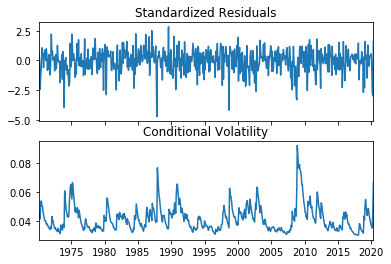

In [100]:
print(AR_GARCH_11.plot())

Kurtosis:  4.645819239808538
JB Test Statistic:  122.9366
P-Value:  0.0
Reject null at 5% level? YES


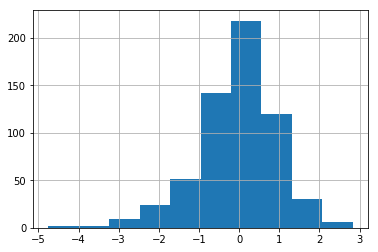

In [104]:
series = AR_GARCH_11.std_resid
series.hist()
jarque_bera(series)
print("Kurtosis: ", kurtosis(series, fisher=False))
print("JB Test Statistic: ", round(jarque_bera(series)[0], 4))
print("P-Value: ", round(jarque_bera(series)[1], 4))
if (jarque_bera(series)[1]<0.05):
    print("Reject null at 5% level? YES")
else:
    print("Reject null at 5% level? NO")

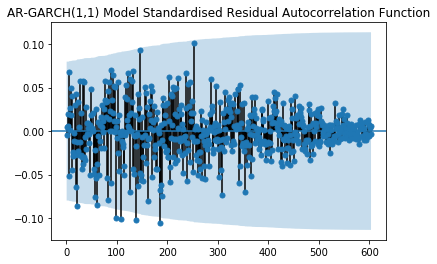

In [111]:
acfplot = plot_acf(series, alpha = .05, zero = False)
plt.title('AR-GARCH(1,1) Model Standardised Residual Autocorrelation Function')
plt.show()

C:\Users\maxru\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001812. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\maxru\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      1,   Func. Count:      7,   Neg. LLF: -1083.2871728276298
Iteration:      2,   Func. Count:     24,   Neg. LLF: -554.0996630984633
Iteration:      3,   Func. Count:     35,   Neg. LLF: -555.1027495368169
Iteration:      4,   Func. Count:     46,   Neg. LLF: -947.9782276816928
Iteration:      5,   Func. Count:     55,   Neg. LLF: -961.5383215486677
Iteration:      6,   Func. Count:     63,   Neg. LLF: -1049.352412337927
Iteration:      7,   Func. Count:     71,   Neg. LLF: -1052.9459955113448
Iteration:      8,   Func. Count:     79,   Neg. LLF: -1057.023803071254
Iteration:      9,   Func. Count:     86,   Neg. LLF: -1059.0714681456961
Iteration:     10,   Func. Count:     94,   Neg. LLF: -1061.9692379254698
Iteration:     11,   Func. Count:    111,   Neg. LLF: 793.2151994019491
Iteration:     12,   Func. Count:    118,   Neg. LLF: 666.1761802733195
Iteration:     13,   Func. Count:    129,   Neg. LLF: -964.7466625654689
Iteration:     14,   Func. Count:    138,   Neg. 

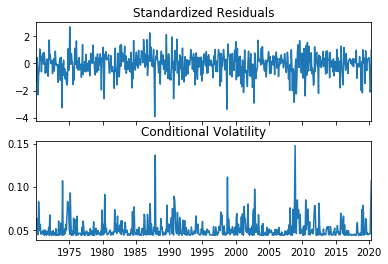

In [109]:
AR_GARCH_11_Students_t = arch_model(residuals, mean='AR', vol='GARCH', p=1, q=1, dist = 'StudentsT').fit()
print(AR_GARCH_11_Students_t.plot())

In [120]:
#Multivariate GARCH for dynamic covariance matrices - Python packages lacking

In [ ]:
#Forecast Error Variance Decomposition / Connectedness Across FX Pairs, Equity industries, asset classes